<a href="https://colab.research.google.com/github/jaguzman/FundamentosEnHerramientasDeTransformacionDigital/blob/master/Unidad%203%20-%20Aprendizaje%20de%20m%C3%A1quinas/3_Aprendizaje%20No%20Supervisado/Material%20auxiliar/Actividad_ReglasAsociacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ACTIVIDAD DE REGLAS DE ASOCIACIÓN**

Se tiene una base de datos de compras en un supermercado. 
1. Graficar los 5 artículos más vendidos.
2. Imprimir los artículos más frecuentes.
3. Realizar el análisis de reglas de asiciación de los productos

In [ ]:
# Importar la librería
import numpy as np 
import pandas as pd 

# Librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns

!pip install apyori
# Librerías de Aprendizaje de máquinas
from apyori import apriori

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**IMPORTAR LA BASE DE DATOS**

In [ ]:
# Leer los datos desde el GitHub
dataTable = pd.read_csv("https://raw.githubusercontent.com/jaguzman/dataSets/master/datasets/dataset_group_RandomShoppingCart.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

# Imprimir el tamaño de la base de datos
print(dataTable.shape)
# Imprimir las primeras líneas
dataTable.head()

(22343, 3)


,Date,Transaction,Item
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose


**DESCRIPCIÓN DE LA BASE DE DATOS**

**[1] Date:** fecha de la compra (estampa de tiempo)

**[2] Transaction:** número de indentificación de la compra. En cada fila se registra un artículo, pero este puede pertenecer a un grupo de artículos comprados. (numérico) 

**[4] Item:** artículo comprado (categórica)

**Solución 1. Los 5 artículos más vendidos**

Text(0.5, 1.0, 'Los más vendidos')

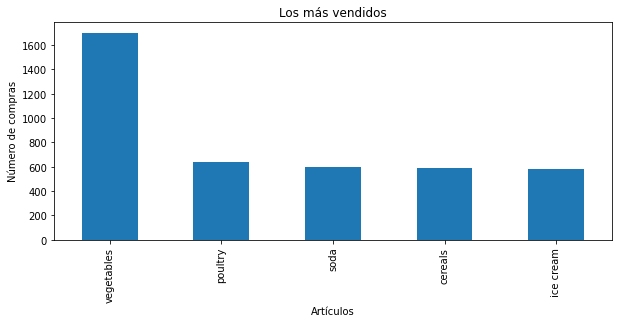

In [ ]:
# Tamaño de la gráfica
plt.figure(figsize=(__,__))
# Top 10 de los artículos más vendidos
dataTable['__'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar')
# Nombre del eje y
plt.ylabel('Número de compras')
# Nombre del eje x
plt.xlabel('Artículos')
# Título
plt.title('Los más vendidos')

**Solución 2. Los artículos más frecuentes**

Conjunto de datos que contiene listas de artículos que se compraron juntos.

In [ ]:
lst=[]
for item in dataTable['__'].unique():
    lst2=list(set(dataTable[dataTable['__']==item]['__']))
    if len(lst2)>0:
        lst.append(lst2)
print(lst[0:3])
print(len(lst))

[['vegetables', 'beef', 'ice cream', 'sandwich bags', 'dinner rolls', 'lunch meat', 'yogurt', 'butter', 'pork', 'shampoo', 'soda', 'flour', 'soap', 'laundry detergent', 'all- purpose', 'aluminum foil', 'mixes'], ['vegetables', 'sandwich bags', 'dishwashing liquid/detergent', 'cheeses', 'yogurt', 'tortillas', 'toilet paper', 'waffles', 'shampoo', 'milk', 'cereals', 'hand soap', 'laundry detergent', 'mixes', 'aluminum foil', 'individual meals'], ['vegetables', 'ice cream', 'dinner rolls', 'lunch meat', 'cheeses', 'poultry', 'toilet paper', 'sandwich loaves', 'pork', 'milk', 'soda', 'shampoo', 'soap', 'cereals', 'bagels', 'hand soap', 'laundry detergent', 'ketchup', 'eggs', 'spaghetti sauce']]
1139


In [ ]:
# Los artículos más frecuentes
rules = apriori(lst, min_support=0.25, min_confidence=0.25, min_lift=1, min_length=1)
rules = list(__)
rules

[RelationRecord(items=frozenset({'all- purpose'}), support=0.3748902546093064, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'all- purpose'}), confidence=0.3748902546093064, lift=1.0)]),
 RelationRecord(items=frozenset({'aluminum foil'}), support=0.3845478489903424, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'aluminum foil'}), confidence=0.3845478489903424, lift=1.0)]),
 RelationRecord(items=frozenset({'bagels'}), support=0.3854258121158911, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'bagels'}), confidence=0.3854258121158911, lift=1.0)]),
 RelationRecord(items=frozenset({'beef'}), support=0.3748902546093064, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beef'}), confidence=0.3748902546093064, lift=1.0)]),
 RelationRecord(items=frozenset({'butter'}), support=0.3678665496049166, ordered_statistics=[OrderedStatistic(items_base=frozenset(), 

**Solución 3. Análisis de Reglas de Asiciación de los productos** 

In [ ]:
# los artículos con su antecedente y consecuente y sus respectivas métricas
for item in __:
    inner_rule = item[2]
    items = [x for x in inner_rule]
    print(items)

[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'all- purpose'}), confidence=0.3748902546093064, lift=1.0)]
[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'aluminum foil'}), confidence=0.3845478489903424, lift=1.0)]
[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'bagels'}), confidence=0.3854258121158911, lift=1.0)]
[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beef'}), confidence=0.3748902546093064, lift=1.0)]
[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'butter'}), confidence=0.3678665496049166, lift=1.0)]
[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'cereals'}), confidence=0.39596136962247586, lift=1.0)]
[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'cheeses'}), confidence=0.3906935908691835, lift=1.0)]
[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'coffee/tea'}), confidence=0.37928007023705007, lift=1.0)]
[OrderedStatistic(items_base=frozenset(), ite